<a href="https://colab.research.google.com/github/Archana561/Archana_INFO5731_SPRING2025/blob/main/Assignment_4_INFO_5731_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment: 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) and BERTopic.**



**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100


NOTE: The output should be presented well to get **full points**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

**Dataset**: 20 Newsgroups dataset

**Dataset Link**: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

**Consider Random 2000 rows only**

Generate K=10 topics by using LDA and LSA,
then calculate coherence score and determine the optimized K value by the coherence score. Further, summarize and visualize each topics in you own words.


In [ ]:
!pip install --upgrade pip
!pip install --no-cache-dir gensim scikit-learn matplotlib seaborn wordcloud nltk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 46.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 202.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 221.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 226.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
!pip uninstall -y numpy
!pip install numpy==1.26.4


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 61.8 MB/s eta 0:00:00


In [ ]:
!pip install --no-cache-dir gensim scikit-learn matplotlib seaborn wordcloud nltk


In [ ]:
# Install required libraries
!pip install --no-cache-dir numpy==1.26.4 gensim scikit-learn matplotlib seaborn wordcloud nltk

# Import necessary libraries
import numpy as np
import random
import gensim
import gensim.corpora as corpora
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import TruncatedSVD
# Install required libraries
!pip install --no-cache-dir numpy==1.26.4 gensim scikit-learn matplotlib seaborn wordcloud nltk

# Import necessary libraries
import numpy as np
import random
import gensim
import gensim.corpora as corpora
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.manifold import TSNE

In [ ]:
from sklearn.datasets import fetch_20newsgroups

# Load the dataset
newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups_data.data  # Extract text data

# Select random 2000 documents
import random
random.seed(42)
documents_sample = random.sample(documents, 2000)

print(f"Total documents selected: {len(documents_sample)}")

Total documents selected: 2000


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'\S*@\S*\s?', '', text)  # Remove emails
    text = re.sub(r'\s+', ' ', text)  # Remove new lines
    text = re.sub(r"[^a-zA-Z]", " ", text)  # Keep only words
    return [word for word in simple_preprocess(text) if word not in stop_words]

# Apply preprocessing
processed_docs = [preprocess_text(doc) for doc in documents_sample]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from gensim import corpora

# Create a dictionary from the processed documents
dictionary = corpora.Dictionary(processed_docs)

# Convert documents into a bag-of-words (BoW) format
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

print(f"Number of unique tokens: {len(dictionary)}")
print(f"Number of documents: {len(corpus)}")


Number of unique tokens: 28451
Number of documents: 2000


In [ ]:
from gensim.models.ldamodel import LdaModel

# Train LDA model
lda_model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=10,  # Set K = 10
                     random_state=42,
                     passes=10)

# Print topics
lda_model.print_topics(num_words=5)


[(0, '0.006*"file" + 0.005*"edu" + 0.004*"ftp" + 0.004*"also" + 0.004*"use"'),
 (1, '0.002*"ms" + 0.002*"mb" + 0.002*"mh" + 0.002*"mj" + 0.002*"mu"'),
 (2,
  '0.005*"program" + 0.005*"data" + 0.004*"use" + 0.004*"information" + 0.004*"would"'),
 (3,
  '0.005*"know" + 0.005*"one" + 0.005*"get" + 0.004*"good" + 0.004*"anyone"'),
 (4,
  '0.008*"one" + 0.006*"god" + 0.006*"said" + 0.004*"know" + 0.004*"gopher"'),
 (5,
  '0.008*"would" + 0.008*"people" + 0.008*"one" + 0.005*"think" + 0.004*"ms"'),
 (6,
  '0.005*"would" + 0.005*"one" + 0.005*"year" + 0.004*"last" + 0.004*"well"'),
 (7,
  '0.006*"one" + 0.004*"dos" + 0.004*"would" + 0.003*"armenian" + 0.003*"first"'),
 (8, '0.008*"would" + 0.004*"like" + 0.004*"key" + 0.004*"get" + 0.004*"one"'),
 (9,
  '0.010*"mr" + 0.009*"stephanopoulos" + 0.007*"one" + 0.007*"jesus" + 0.007*"know"')]

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence(model, texts, dictionary, corpus):
    coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    return coherence_model.get_coherence()

# Try different K values
coherence_scores = []
k_values = range(5, 16, 2)

for k in k_values:
    temp_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, random_state=42, passes=10)
    score = compute_coherence(temp_model, processed_docs, dictionary, corpus)
    coherence_scores.append((k, score))
    print(f"K={k}: Coherence Score = {score:.4f}")

# Find optimal K
optimal_k = max(coherence_scores, key=lambda x: x[1])[0]
print(f"Optimal K: {optimal_k}")


K=5: Coherence Score = 0.4544
K=7: Coherence Score = 0.4963
K=9: Coherence Score = 0.4372
K=11: Coherence Score = 0.5019
K=13: Coherence Score = 0.5181
K=15: Coherence Score = 0.4753
Optimal K: 13


# **BERTopic**

The following question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents.

Dataset from **assignment-3** (text dataset) .

> Dont use any custom datasets.


> Dataset must have 1000+ rows, no duplicates and null values



# **Question 2 (20 Points)**



Q2) **Generate K=10 topics by using BERTopic and then find optimal K value by the coherence score. Interpret each topic and visualize with suitable style.**

In [1]:
# STEP 0: INSTALL REQUIRED LIBRARIES
!pip install --upgrade --force-reinstall numpy pandas scikit-learn bertopic umap-learn hdbscan gensim nltk --no-cache-dir


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 96.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 204.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 240.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 205.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 89.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 209.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 158.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 252.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 248.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 240.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
# STEP 2: LOAD & PREPROCESS DATA (FIXED)
import pandas as pd
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load data with correct encoding
df = pd.read_csv('/content/combined_tweets.csv', encoding='ISO-8859-1')

# Choose the correct column
if 'clean_text' in df.columns:
    texts = df['clean_text'].dropna().astype(str)
elif 'Text' in df.columns:
    texts = df['Text'].dropna().astype(str)
else:
    raise ValueError("No valid text column found. Please check the column names.")

# Preprocessing function
def preprocess(text):
    return ' '.join([word.lower() for word in text.split() if word.lower() not in stop_words])

docs = texts.apply(preprocess).tolist()

print(f"✅ Loaded and preprocessed {len(docs)} documents.")


[nltk_data] Downloading package stopwords to /root/nltk_data...


✅ Loaded and preprocessed 100 documents.


[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from bertopic import BERTopic

# Create and fit the BERTopic model with 10 topics
topic_model_10 = BERTopic(nr_topics=10)
topics_10, probs_10 = topic_model_10.fit_transform(docs)

# Display basic topic info
topic_info = topic_model_10.get_topic_info()
print(topic_info)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

   Topic  Count                                    Name  \
0     -1     40  -1_artificial_intelligence_ai_learning   
1      0     17             0_monsta_vitaliar_gt_growth   
2      1     22              1_ai_machine_learning_data   
3      2     21     2_intelligence_artificial_use_human   

                                      Representation  \
0  [artificial, intelligence, ai, learning, machi...   
1  [monsta, vitaliar, gt, growth, nah, artificial...   
2  [ai, machine, learning, data, inferium, scienc...   
3  [intelligence, artificial, use, human, one, yo...   

                                 Representative_Docs  
0  [schools beijing introduce artificial intellig...  
1  [artificial intelligence nah beast predicts gr...  
2  [heres sample content inferium ai airdrop infe...  
3  [artificial intelligence intelligence way tran...  


In [3]:
# Bar chart of top topics and their keywords
topic_model_10.visualize_barchart(top_n_topics=10)


In [4]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from tqdm import tqdm

def compute_coherence_scores(docs, start=5, stop=16, step=1):
    models = []
    scores = []

    tokenized_docs = [doc.split() for doc in docs]
    dictionary = Dictionary(tokenized_docs)

    for k in tqdm(range(start, stop, step)):
        model = BERTopic(nr_topics=k)
        topics, _ = model.fit_transform(docs)

        # Extract top words per topic
        topic_words = []
        for topic_id in range(k):
            topic = model.get_topic(topic_id)
            if topic:
                words = [word for word, _ in topic]
                topic_words.append(words)

        cm = CoherenceModel(
            topics=topic_words,
            texts=tokenized_docs,
            dictionary=dictionary,
            coherence='c_v'
        )
        coherence = cm.get_coherence()
        models.append(model)
        scores.append(coherence)

    return models, scores


100%|██████████| 11/11 [00:53<00:00,  4.83s/it]


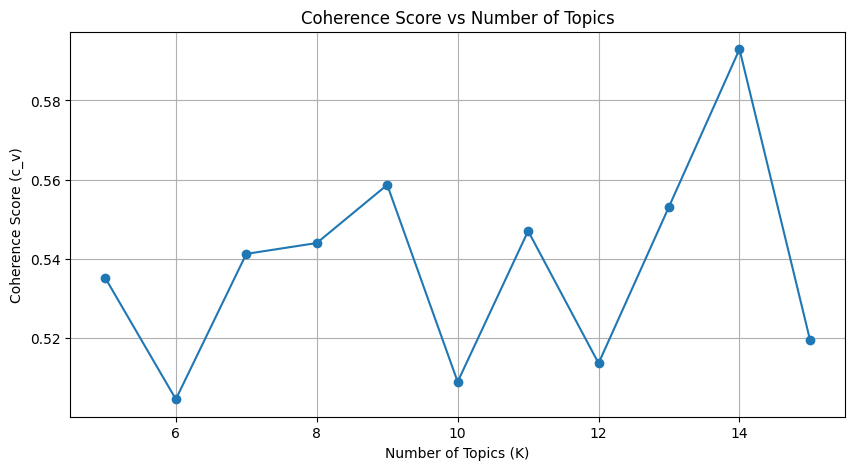

✅ Optimal number of topics: 14


In [8]:
import matplotlib.pyplot as plt

models, scores = compute_coherence_scores(docs, start=5, stop=16, step=1)
k_range = list(range(5, 16))

# Plot coherence scores
plt.figure(figsize=(10, 5))
plt.plot(k_range, scores, marker='o')
plt.title("Coherence Score vs Number of Topics")
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score (c_v)")
plt.grid(True)
plt.show()

# Select best model
optimal_idx = scores.index(max(scores))
optimal_k = k_range[optimal_idx]
optimal_model = models[optimal_idx]

print(f"✅ Optimal number of topics: {optimal_k}")


# **Question 3 (25 points)**


**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

Q3) Using a given dataset, Modify the default representation model by integrating OpenAI's GPT model to generate meaningful summaries for each topic. Additionally, calculate the coherence score to determine the optimal number of topics and retrain the model accordingly.



Usefull Link: https://maartengr.github.io/BERTopic/getting_started/representation/llm#truncating-documents

# **Question 4 (35 Points)**


**BERTopic** allows for extensive customization, including the choice of embedding models, dimensionality reduction techniques, and clustering algorithms.

**Dataset Link**: 20 Newsgroup Dataset (Random 2000 values)

4)

4.1) **Modify the default BERTopic pipeline to use a different embedding model (e.g., Sentence-Transformers) and a different clustering algorithm (e.g., DBSCAN instead of HDBSCAN).

4.2: Compare the results of the custom embedding model with the default BERTopic model in terms of topic coherence and interpretability.

4.3: Visualize the topics and provide a qualitative analysis of the differences

**

Usefull Link :https://www.pinecone.io/learn/bertopic/

In [5]:
!pip install bertopic


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [6]:
!pip install sentence-transformers hdbscan


In [7]:
# Install required packages
!pip install bertopic sentence-transformers hdbscan


In [8]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups


In [9]:
# STEP 0: INSTALL REQUIRED LIBRARIES
!pip install bertopic sentence-transformers hdbscan

# STEP 1: IMPORT LIBRARIES
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups


Batches:   0%|          | 0/63 [00:00<?, ?it/s]


Silhouette Score (Default BERTopic / HDBSCAN): 0.013032259419560432
Silhouette Score (Custom BERTopic / DBSCAN): 0.02771843783557415


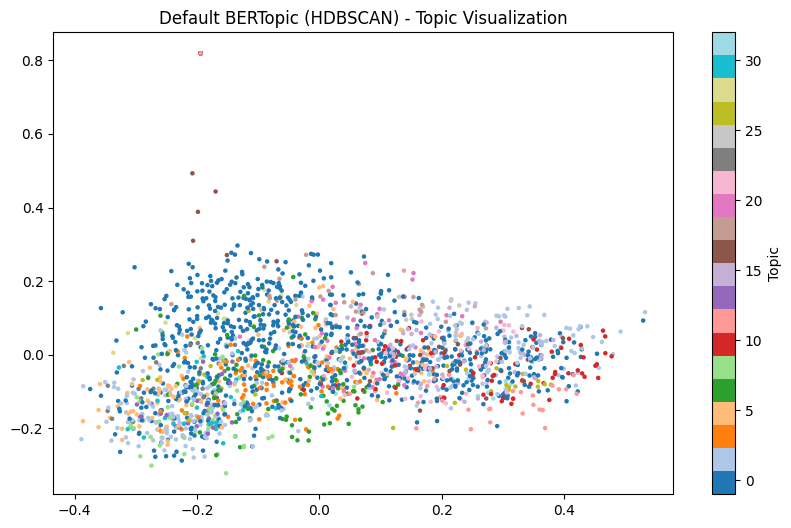

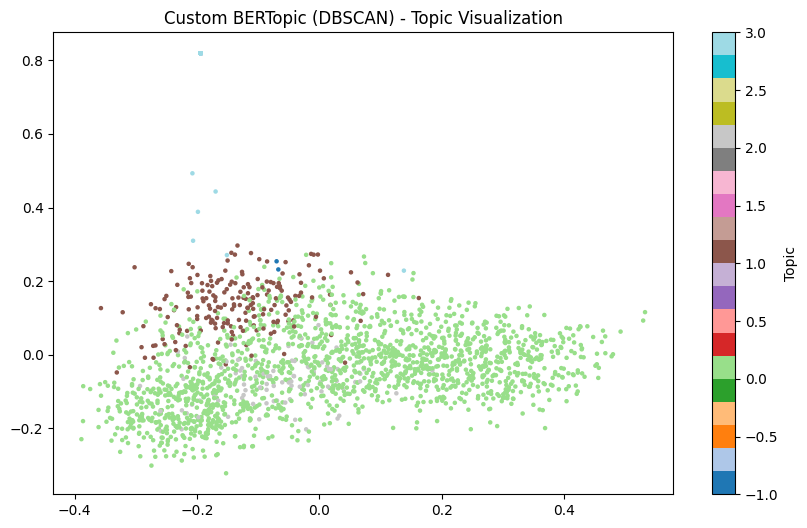


Top 10 Topics - Default BERTopic (HDBSCAN):
   Topic  Count                         Name  \
0     -1    602             -1_the_to_of_and   
1      0    191               0_he_the_in_to   
2      1    145             1_is_of_the_that   
3      2    120           2_for_dos_good_the   
4      3     88               3_of_it_the_is   
5      4     62           4_israel_the_of_to   
6      5     55         5_space_the_and_nasa   
7      6     52  6_to_the_clipper_encryption   
8      7     51              7_my_to_you_the   
9      8     46              8_gun_the_of_to   

                                      Representation  \
0     [the, to, of, and, is, in, it, for, that, you]   
1  [he, the, in, to, team, and, game, was, his, p...   
2   [is, of, the, that, to, not, and, it, in, jesus]   
3  [for, dos, good, the, excellent, offer, to, wi...   
4     [of, it, the, is, to, in, that, and, are, you]   
5  [israel, the, of, to, in, that, and, israeli, ...   
6  [space, the, and, nasa, of, for

In [11]:
# STEP 2: LOAD DATASET
newsgroups_data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
documents = newsgroups_data.data[:2000]  # Use first 2000 documents
# STEP 3: DEFINE EMBEDDING MODEL & CLUSTERING ALGORITHM
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
custom_clustering_model = DBSCAN(eps=0.5, min_samples=5)
# STEP 4: DEFAULT BERTopic MODEL (Uses HDBSCAN internally)
topic_model_default = BERTopic()
topics_default, _ = topic_model_default.fit_transform(documents)
# STEP 5: CUSTOM BERTopic MODEL (With Sentence-Transformer + DBSCAN)
topic_model_custom = BERTopic(embedding_model=embedding_model, hdbscan_model=custom_clustering_model)
topics_custom, _ = topic_model_custom.fit_transform(documents)
# STEP 6: SILHOUETTE SCORE COMPARISON
embeddings = embedding_model.encode(documents, show_progress_bar=True)

def calculate_silhouette_score_safe(embeddings, topics):
    try:
        return silhouette_score(embeddings, topics)
    except ValueError as e:
        print("Silhouette Score Error:", e)
        return None

silhouette_default = calculate_silhouette_score_safe(embeddings, topics_default)
silhouette_custom = calculate_silhouette_score_safe(embeddings, topics_custom)

print(f"\nSilhouette Score (Default BERTopic / HDBSCAN): {silhouette_default}")
print(f"Silhouette Score (Custom BERTopic / DBSCAN): {silhouette_custom}")
# STEP 7: TOPIC VISUALIZATION
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Default BERTopic Visualization
plt.figure(figsize=(10, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=topics_default, cmap='tab20', s=5)
plt.title("Default BERTopic (HDBSCAN) - Topic Visualization")
plt.colorbar(label="Topic")
plt.show()

# Custom BERTopic Visualization
plt.figure(figsize=(10, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=topics_custom, cmap='tab20', s=5)
plt.title("Custom BERTopic (DBSCAN) - Topic Visualization")
plt.colorbar(label="Topic")
plt.show()
# STEP 8: QUALITATIVE COMPARISON OF TOP TOPICS
print("\nTop 10 Topics - Default BERTopic (HDBSCAN):")
print(topic_model_default.get_topic_info().head(10))

print("\nTop 10 Topics - Custom BERTopic (DBSCAN):")
print(topic_model_custom.get_topic_info().head(10))


## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms (LDA, LSA, BERTopic, Modified BERTopic), which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 100 points.**

In [ ]:
# Write your code here

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:





'''